# Monte Carlo policy evaluation on Black Jack 

In [1]:
from env_black_jack import BlackjackEnv
import numpy as np
from collections import defaultdict
import sys

import plotting

## Strategy to evaluate 

In [2]:
def strategy(observation):
    """
    Input : Observation is the cards values in front of the player
    Ouput : An action
    """
    score, _, _ = observation
    return int(score < 20) 

## Playing with the environment 

In [3]:
def print_observation(observation):
    score, dealer_score, usable_ace = observation
    print("Player Score: {} (Usable Ace: {}), Dealer Score: {}".format(
          score, usable_ace, dealer_score))

In [4]:
env = BlackjackEnv()


# To understand the env try this : 
for i in range(5):
    observation = env.reset()
    for t in range(100):
        print_observation(observation)
        action = strategy(observation)
        print("Taking action: {}".format( ["Stick", "Hit"][action]))
        observation, reward, done, _ = env.step(action)
        if done:
            print_observation(observation)
            print("Game end. Reward: {}\n".format(float(reward)))
            break

Player Score: 15 (Usable Ace: False), Dealer Score: 10
Taking action: Hit
Player Score: 16 (Usable Ace: False), Dealer Score: 10
Taking action: Hit
Player Score: 22 (Usable Ace: False), Dealer Score: 10
Game end. Reward: -1.0

Player Score: 21 (Usable Ace: True), Dealer Score: 10
Taking action: Stick
Player Score: 21 (Usable Ace: True), Dealer Score: 10
Game end. Reward: 1.0

Player Score: 12 (Usable Ace: False), Dealer Score: 5
Taking action: Hit
Player Score: 17 (Usable Ace: False), Dealer Score: 5
Taking action: Hit
Player Score: 27 (Usable Ace: False), Dealer Score: 5
Game end. Reward: -1.0

Player Score: 12 (Usable Ace: False), Dealer Score: 10
Taking action: Hit
Player Score: 15 (Usable Ace: False), Dealer Score: 10
Taking action: Hit
Player Score: 25 (Usable Ace: False), Dealer Score: 10
Game end. Reward: -1.0

Player Score: 15 (Usable Ace: True), Dealer Score: 10
Taking action: Hit
Player Score: 15 (Usable Ace: False), Dealer Score: 10
Taking action: Hit
Player Score: 25 (Usabl

## Monte-Carlo first-visit policy evaluation 

In [5]:
def sample_episode(env):
    """ Return the history of an episode """
    history = []
    done = False
    observation = env.reset()
    while not done:
        action = strategy(observation)
        state, reward, done, _ = env.step(action)
        history.append((state, action, reward))
    return history


def first_visit_Monte_Carlo(env, n_iteration, gamma=1.0):
    
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
        
    V = defaultdict()
    for i in range(n_iteration):
        if i % 1000 == 0:
            print("\rEpisode {}/{}.".format(i, n_iteration), end="")
            sys.stdout.flush()

        history = sample_episode(env)
        set_states_episode = set([state for state, _, _ in history])
        for state in set_states_episode:
            idx_first_occurence = next(i for i, x in enumerate(history) if x[0] == state)
            G = sum([reward*gamma**i \
                for i, (_, _, reward) in enumerate(history[idx_first_occurence:])])
            returns_sum[state] += G
            returns_count[state] += 1.0
            V[state] = returns_sum[state] / returns_count[state]
    return V


## Results

Episode 9000/10000.

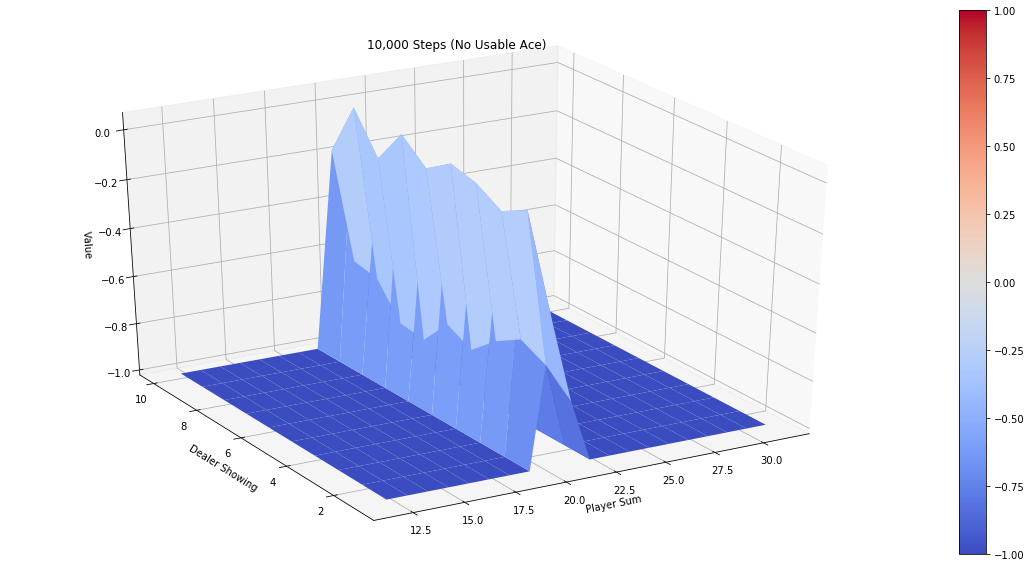

In [6]:
env = BlackjackEnv()
V = first_visit_Monte_Carlo(env, 10000, gamma=1.0)
plotting.plot_value_function(V, title="10,000 Steps")


## With another strategy

Episode 9000/10000.

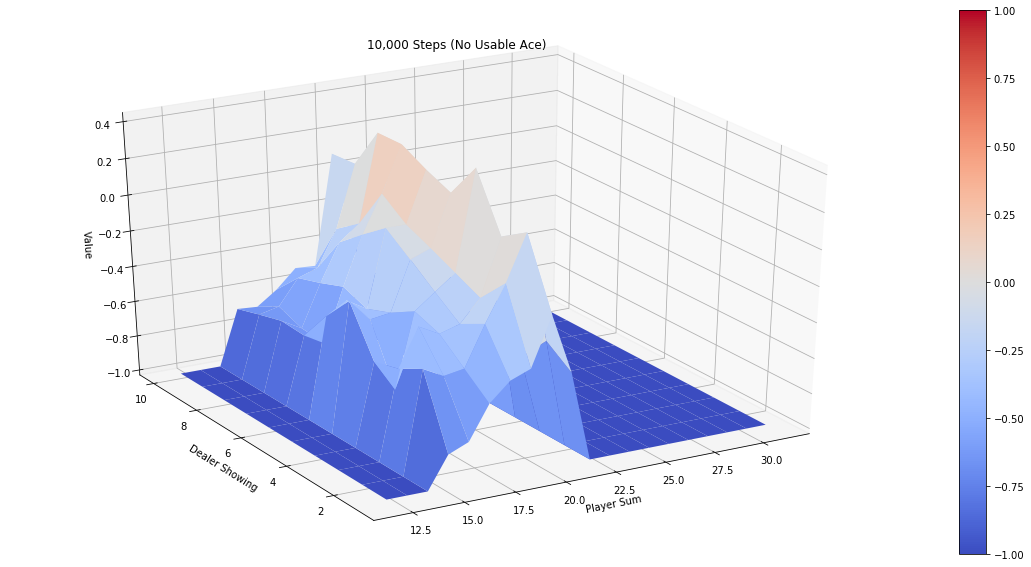

In [7]:
def strategy(observation):
    """
    Input : Observation is the cards values in front of the player
    Ouput : An action
    """
    score, _, _ = observation
    return int(score < 15) 


env = BlackjackEnv()
V = first_visit_Monte_Carlo(env, 10000, gamma=1.0)
plotting.plot_value_function(V, title="10,000 Steps")